In [1]:
#Gautami Kadam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
#Gautami Kadam
df1 = df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

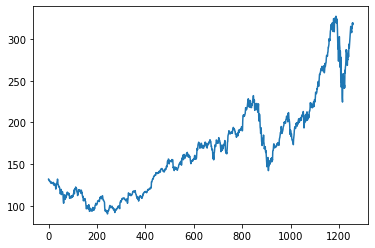

In [4]:
plt.plot(df1)

In [5]:
#Gautami Kadam
scale = MinMaxScaler(feature_range=(0,1))
df1 = scale.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [6]:
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [7]:
train_size,test_size

(817, 441)

In [8]:
#Gautami Kadam
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [9]:
def create(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return(np.array(dataX),np.array(dataY))

In [10]:
#Gautami Kadam
time_step=100
X_train,y_train = create(train_data,time_step)
X_test,y_test = create(test_data,time_step)

In [11]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [12]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [13]:
#Gautami Kadam
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape),print(X_test.shape)

(716, 100, 1)
(340, 100, 1)


(None, None)

In [14]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Gautami Kadam
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 24s 638ms/step - loss: 0.0135 - val_loss: 0.0632
Epoch 2/100
12/12 [==============================] - 4s 324ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 4s 308ms/step - loss: 9.3489e-04 - val_loss: 0.0075
Epoch 4/100
12/12 [==============================] - 4s 314ms/step - loss: 7.3734e-04 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 4s 321ms/step - loss: 6.5209e-04 - val_loss: 0.0040
Epoch 6/100
12/12 [==============================] - 4s 320ms/step - loss: 6.1325e-04 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 4s 313ms/step - loss: 6.2660e-04 - val_loss: 0.0037
Epoch 8/100
12/12 [==============================] - 4s 316ms/step - loss: 6.1965e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 4s 320ms/step - loss: 6.0855e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 4s 334ms

12/12 [==============================] - 4s 375ms/step - loss: 1.8499e-04 - val_loss: 9.9575e-04
Epoch 79/100
12/12 [==============================] - 4s 294ms/step - loss: 1.9023e-04 - val_loss: 0.0011
Epoch 80/100
12/12 [==============================] - 3s 295ms/step - loss: 1.7514e-04 - val_loss: 0.0011
Epoch 81/100
12/12 [==============================] - 4s 294ms/step - loss: 1.8121e-04 - val_loss: 0.0013
Epoch 82/100
12/12 [==============================] - 4s 301ms/step - loss: 1.6498e-04 - val_loss: 9.7017e-04
Epoch 83/100
12/12 [==============================] - 4s 304ms/step - loss: 1.7027e-04 - val_loss: 0.0010
Epoch 84/100
12/12 [==============================] - 4s 299ms/step - loss: 1.5872e-04 - val_loss: 9.6140e-04
Epoch 85/100
12/12 [==============================] - 4s 295ms/step - loss: 1.6182e-04 - val_loss: 0.0011
Epoch 86/100
12/12 [==============================] - 3s 293ms/step - loss: 1.5581e-04 - val_loss: 0.0011
Epoch 87/100
12/12 [===========================

In [17]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [18]:
train_pred = scale.inverse_transform(train_pred)
test_pred = scale.inverse_transform(test_pred)

In [19]:
#Gautami Kadam
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

142.07075139104955

In [20]:
math.sqrt(mean_squared_error(y_test,test_pred))

238.0081943451744

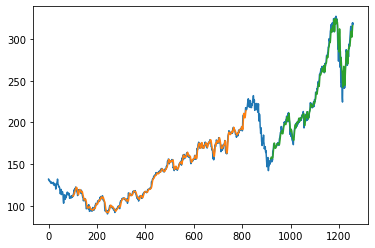

In [21]:
look_back = 100
trainpredplot = np.empty_like(df1)
trainpredplot[:,:] = np.nan
trainpredplot[look_back:len(train_pred)+look_back,:] = train_pred
testpredplot = np.empty_like(df1)
testpredplot[:,:] = np.nan
testpredplot[len(train_pred)+(look_back*2)+1:len(df1)-1,:] = test_pred
plt.plot(scale.inverse_transform(df1))
plt.plot(trainpredplot)
plt.plot(testpredplot)
plt.show()

In [22]:
len(test_data)

441

In [23]:
#Gautami Kadam
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [24]:
temp = list(x_input)
temp = temp[0].tolist()

In [25]:
len(temp)

100

In [26]:
#Gautami Kadam
lst_out = []
steps = 100
i=0
while(i<30):
    if(len(temp)>100):
        x_input = np.array(temp[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,steps,1))
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        lst_out.extend(yhat.tolist())
        i = i+1
        
    else:
        x_input = x_input.reshape((1,steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        lst_out.extend(yhat.tolist())
        i = i+1
        
print(lst_out)

[0.95453936]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

9 day output [[0.9366592]]
10 day input [0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239 

18 day output [[0.9289168]]
19 day input [0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.95453936 0.94559914 0.93411171
 0.92361015 0.91640943 0.

26 day output [[0.95750004]]
27 day input [0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.95453936 0.94559914 0.93411171 0.92361015 0.91640943
 0.9137243  0.91564447 0.92124915 0.92890173 0.93665922 0.94272608
 0.94586098 0.94564539 0

In [28]:
day = np.arange(1,101)
day_pred = np.arange(101,131)

In [29]:
len(df1)

1258

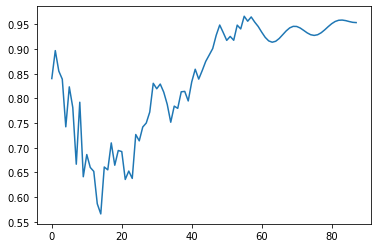

In [31]:
df3 = df1.tolist()
df3.extend(lst_out)
plt.plot(df3[1200:])